# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# No missing values are there, in the data

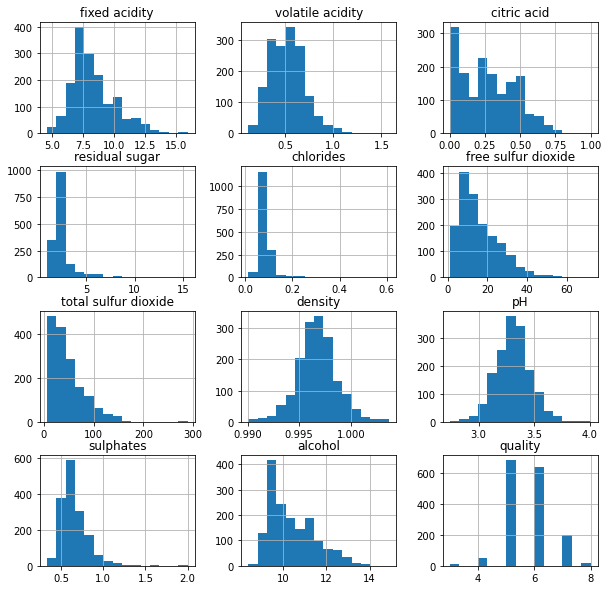

In [6]:
df.hist(bins=15,figsize=(10,10))
plt.show()

In [13]:
# Plotting the varible quality to explore the data and see the distribution of good quality of wines.

(array([ 10.,  53., 681., 638., 199.,  18.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

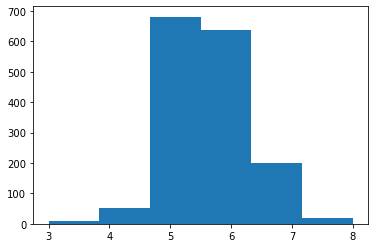

In [9]:
plt.hist(df['quality'],bins=6)

In [10]:
# Now, we can draw the correlation matrix to see the relation between the variables.

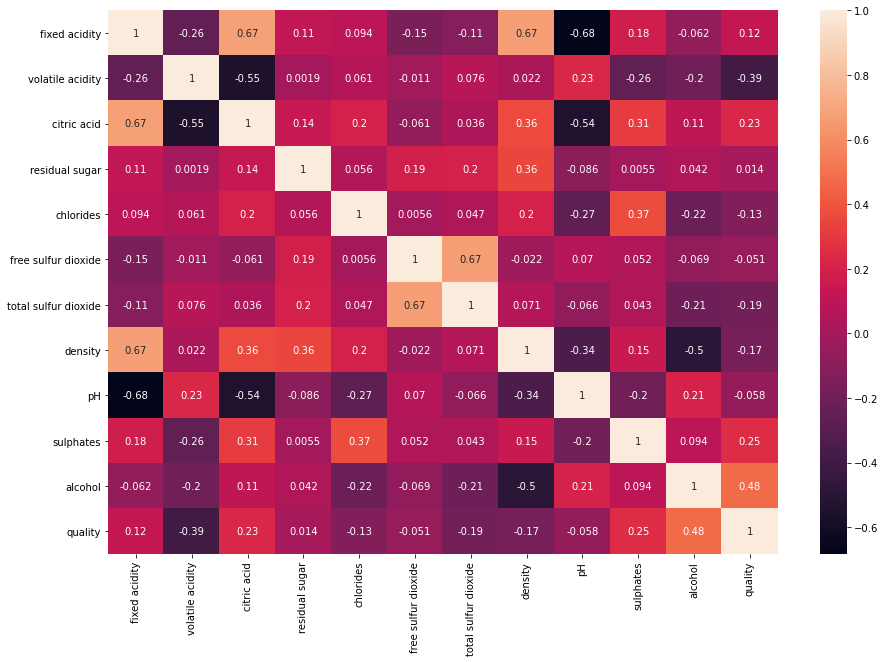

In [11]:
cor=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.show()

In [15]:
for i in range(len(df['quality'])):
    if df['quality'][i] >= 7:
        df['quality'][i]= 1
    else:
        df['quality'][i]=0

<ipython-input-15-14a9dfde2046>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'][i]=0
<ipython-input-15-14a9dfde2046>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'][i]= 1


In [16]:
# Seperating the dependent and independent variables.
x=df.drop(['quality','quality'],axis=1)
y=df['quality']

In [17]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
x.shape,y.shape

((1599, 11), (1599,))

In [19]:
# Check the quantity of good and poor wines.
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
# we can see the the quality of poor wine is more than the good wine.

In [21]:
# Now we will prepare the data for modeling. First we will scale the data so that all features are on a same scale.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()
x1=scaler.fit_transform(x)

In [24]:
scaled_x=pd.DataFrame(x1,columns=x.columns)
scaled_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [25]:
# Now we will split the train and test data.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,random_state=0)

In [28]:
# Now the modeling part. First using descision tree.

In [29]:
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(random_state=10)
cl.fit(train_x,train_y)
y_predict=cl.predict(test_x)

In [30]:
from sklearn.metrics import classification_report as cr
print(cr(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       355
           1       0.51      0.80      0.62        45

    accuracy                           0.89       400
   macro avg       0.74      0.85      0.78       400
weighted avg       0.92      0.89      0.90       400



In [31]:
# Now using ROC and AUC curves

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(roc_auc_score(test_y,y_predict))

0.8507042253521127


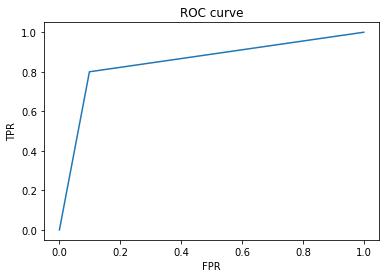

In [33]:
fpr, tpr,_ = roc_curve(test_y, y_predict)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# Now Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(train_x, train_y)
predict_y = rf.predict(test_x)

In [36]:
print(cr(test_y,predict_y))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       355
           1       0.71      0.53      0.61        45

    accuracy                           0.92       400
   macro avg       0.82      0.75      0.78       400
weighted avg       0.92      0.92      0.92       400

